# WHAT AFFECTS INTEREST RATES ON THE PROSPER LOANS?

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of loans granted through the Prosper peer to peer lending company that could be used to predict their interest rates. The main focus was on the credit/risk scores features as these variables are the most important and should be considered by lenders before granting a loan to a particular person.
In addition to that, some other variables such as term, purpose, and income range were used in this particular analysis.

## Dataset Overview

> The dataset consisted of over 100 000 of loans with a variety of different attributes. Some of the entries were removed from the given dataset because of quality issues.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("ProsperData(clean).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111994 entries, 0 to 111993
Data columns (total 21 columns):
Term                           111994 non-null int64
LoanStatus                     111994 non-null object
BorrowerRate                   111994 non-null float64
LoanOriginalAmount             111994 non-null int64
LoanOriginationDate            111994 non-null object
ProsperScore                   83982 non-null float64
BorrowerState                  111994 non-null object
EmploymentStatus               111994 non-null object
EmploymentStatusDuration       111994 non-null int64
IsBorrowerHomeowner            111994 non-null bool
TotalCreditLinespast7years     111994 non-null int64
DelinquenciesLast7Years        111994 non-null int64
PublicRecordsLast10Years       111994 non-null int64
DebtToIncomeRatio              111994 non-null float64
IncomeRange                    111994 non-null object
Recommendations                111994 non-null int64
Purpose                        1

In [4]:
# Change data types
ordered_var_dict = {"IncomeRange":['Not displayed', 'Not employed', '$0', '$1-24,999','$25,000-49,999','$50,000-74,999',
                                   '$75,000-99,999', '$100,000+'],
                    "Term" : [12,36,60]}

for var in ordered_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_var_dict[var])
    df[var] = df[var].astype(ordered_var)

# Convert LoanOriginationDate to datetime
df["LoanOriginationDate"] = pd.to_datetime(df["LoanOriginationDate"])

In [5]:
# Set date column as an index
df.set_index("LoanOriginationDate", inplace = True)
df = df.sort_index()
df

,Term,LoanStatus,BorrowerRate,LoanOriginalAmount,ProsperScore,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,TotalCreditLinespast7years,DelinquenciesLast7Years,PublicRecordsLast10Years,DebtToIncomeRatio,IncomeRange,Recommendations,Purpose,StatedMonthlyIncome,Investors,InvestmentFromFriendsAmount,CreditScore
LoanOriginationDate,,,,,,,,,,,,,,,,,,,,
2006-04-25,36,Completed,0.1500,5000,NaN,MI,Not available,67,False,12,0,0,0.17413,Not displayed,0,Unknown,2500.000000,36,0,669.5
2006-04-25,36,Completed,0.0938,2000,NaN,Unknown,Not available,67,True,9,0,0,0.19398,Not displayed,0,Unknown,2000.000000,32,0,749.5
2006-04-26,36,Defaulted,0.1980,3550,NaN,GA,Not available,67,True,46,1,0,0.33348,Not displayed,0,Unknown,4000.000000,7,0,709.5
2006-04-26,36,Completed,0.1195,3000,NaN,Unknown,Not available,67,True,45,0,0,0.11139,Not displayed,0,Unknown,0.000000,14,0,829.5
2006-04-27,36,Completed,0.1025,2500,NaN,Unknown,Not available,67,True,8,0,0,0.04744,Not displayed,0,Unknown,10750.000000,53,0,709.5
2006-04-28,36,Chargedoff,0.2375,1000,NaN,Unknown,Not available,67,False,14,4,1,0.05148,Not displayed,0,Unknown,1420.000000,10,0,549.5
2006-04-28,36,Completed,0.2100,13000,NaN,MA,Not available,67,False,48,0,0,0.26620,Not displayed,0,Unknown,9916.666667,9,0,669.5
2006-05-01,36,Defaulted,0.1350,5000,NaN,TX,Not available,67,False,23,0,0,0.08632,Not displayed,0,Unknown,17500.000000,41,0,669.5
2006-05-01,36,Completed,0.0825,1000,NaN,LA,Not available,67,True,42,0,0,0.07429,Not displayed,0,Unknown,5000.000000,9,0,769.5


# How do average interest rates change over time?
> Average interest rates are fluctuating over time but not with a large magnitude. There is a consistent increasing trend starting from the Q1 of 2009 right after the so-called "Quiet period" until Q3 of 2010. After that time, we observe mostly downward trend up to 2014 with only minor spikes in the first parts of 2011 and 2012.

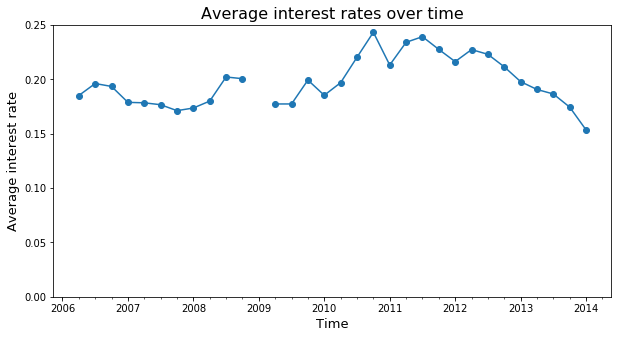

In [6]:
base_color = sb.color_palette()[0]
plt.figure(1, figsize = (10,5))
df.resample("Q")["BorrowerRate"].mean().plot(style = "-ko", color = base_color)
plt.title("Average interest rates over time", fontsize = 16)
plt.xlabel("Time", fontsize = 13)
plt.ylabel("Average interest rate", fontsize = 13)
plt.ylim((0, 0.25));

# Distribution of interest rates

> The distribution of interest rates is slightly right-skewed. Some of the loans had extremely low or even zero interest rates. Therefore, after further investigation, I decided to remove these particular rows as only a few of them were valid when the full amount of the loan was granted by a borrower's friend. 
The interest rate of 31.77% has the highest frequency in the given dataset which is a quite high rate. The majority of the loans granted through the Prosper company have interest rates between 10% and 20%.

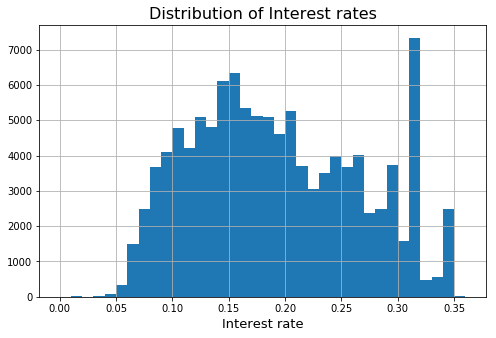

In [7]:
# Plot distribution of the interest rates
plt.figure(1, figsize = (8, 5))
bin_edges = np.arange(0, 0.36+0.01, 0.01)
plt.hist(data = df, x = "BorrowerRate", bins = bin_edges, color = base_color)
plt.grid()
plt.xlabel("Interest rate", fontsize = 13)
plt.title("Distribution of Interest rates", fontsize = 16);

# Distributions of Credit Scores and Prosper Scores

> The distribution of credit scores in this particular dataset follows approximately a normal distribution. <br>
There were some rows which had impossibly low values of Credit Score. Therefore, these particular entries were removed from our dataset. <br>
The most of the people have credit scores in range from 650 to 730. <br>
Most of the clients received a Prosper Score of 4,6 or 8.

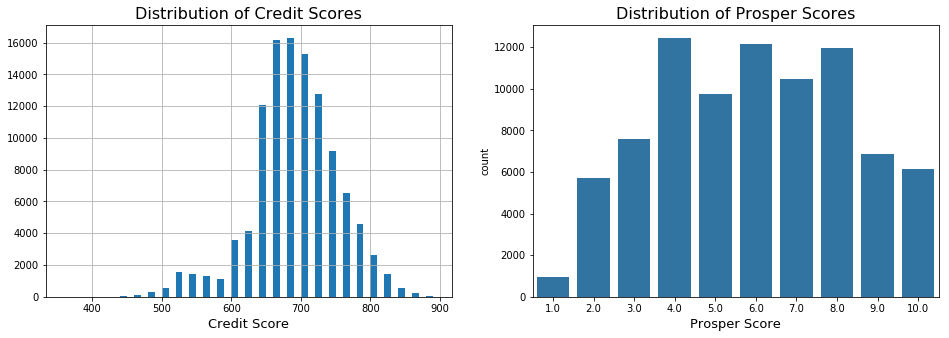

In [8]:
# Plot distribution of Credit Scores
plt.figure(1, figsize = (16,5))
plt.subplot(1,2,1)
bin_edges = np.arange(360, 890+10, 10) 
plt.hist(data = df, x = "CreditScore", bins = bin_edges, color = base_color)
plt.grid()
plt.xlabel("Credit Score", fontsize = 13)
plt.title("Distribution of Credit Scores", fontsize = 16);

plt.subplot(1,2,2)
# Plot distribution of Prosper Scores
sb.countplot(data = df, x = "ProsperScore", color = base_color)
plt.title("Distribution of Prosper Scores", fontsize = 16)
plt.xlabel("Prosper Score", fontsize = 13);

# Relationships between interest rates and numerical variables
> Correlation matrix shows that credit/risk score variables (Credit Score and Proper Score) have the strongest correlation with the variable of interest. Prosper Score has a higher correlation coefficient with interest rate rather than Credit Score because Prosper Scores are developed internally taking into account characteristics of the loan. Contrary, Credit Scores are developed by a third party Consumer Credit Rating Agency and take into consideration only characteristics of the particular individual which allow them to serve as an initial risk score. 


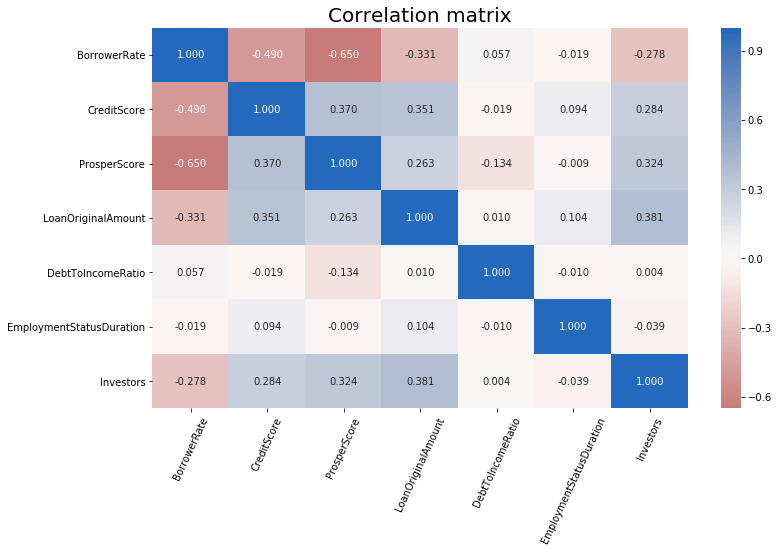

In [9]:
numeric_vars = ["BorrowerRate", "CreditScore", "ProsperScore", "LoanOriginalAmount", "DebtToIncomeRatio",
               "EmploymentStatusDuration", "Investors"]
categorical_vars = ["Purpose", "IncomeRange", "EmploymentStatus", "IsBorrowerHomeowner", "Term"]

# correlation plot
plt.figure(figsize = [12, 7])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
#'vlag_r'
plt.title ("Correlation matrix", fontsize = 20);
plt.xticks(rotation = 65);

# Interest rate vs. CreditScore and Prosper Score
> The scatterplots below prove these negative correlation coefficients. Therefore, the higher the Credit Score/Prosper Score the lower interest rate will be set for a loan.

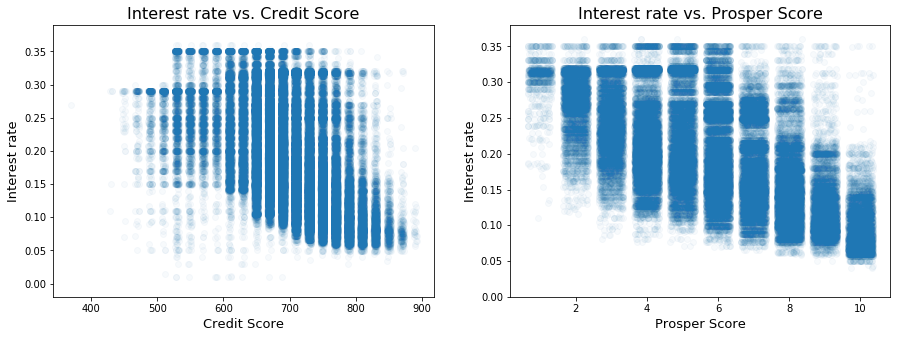

In [10]:
plt.figure(1, figsize = (15,5))
plt.subplot(1,2,1)
sb.regplot(data = df, x = "CreditScore", y = "BorrowerRate", scatter_kws = {"alpha": 0.03}, x_jitter = 3, fit_reg = False,
          color = base_color);
plt.title("Interest rate vs. Credit Score", fontsize = 16);
plt.xlabel("Credit Score", fontsize = 13)
plt.ylabel("Interest rate", fontsize = 13)

plt.subplot(1,2,2)
sb.regplot(data = df, x = "ProsperScore", y = "BorrowerRate", scatter_kws = {"alpha": 0.03}, x_jitter = 0.35, fit_reg = False,
          color = base_color);
plt.title("Interest rate vs. Prosper Score", fontsize = 16);
plt.xlabel("Prosper Score", fontsize = 13)
plt.ylabel("Interest rate", fontsize = 13)
plt.ylim((0, 0.38));

# Interest rates by Prosper Score and Term

> The 1-year loans have the lowest interest rates across all levels of Prosper Score.
The 3-years loans tend to have highest interest rates across Prosper Scores in a range of 1 to 6. In the range 6-10 there is an opposite situation, 5 years loans are provided with the highest rates.
Overall, the interest rates tend to be higher for the long-term loans as the default risk is increasing within the time.

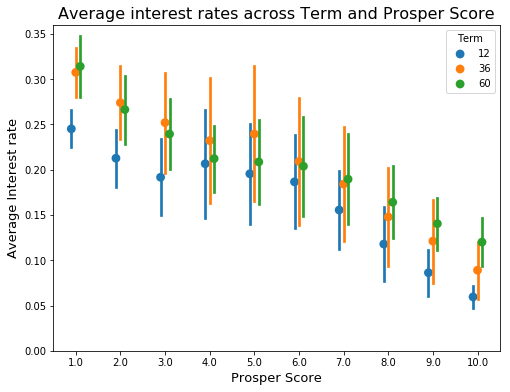

In [11]:
# Plot interest rates across time and Prosper Scores
plt.figure(1, figsize = (8,6))
sb.pointplot(data = df, x = "ProsperScore", y = "BorrowerRate", hue = "Term", linestyles = "", dodge = 0.2, ci = "sd");
plt.ylim((0, 0.36))
plt.title("Average interest rates across Term and Prosper Score", fontsize = 16)
plt.xlabel("Prosper Score", fontsize = 13)
plt.ylabel("Average Interest rate", fontsize = 13);

# Interest rates by Prosper Score and the fact of House ownership

> Borrowers who own real estate receive on average slightly lower interest rates comparing to borrowers who don't. 
However, the Prosper company doesn't take houses as collateral and no difference in Prosper Scores is evidence of that. So, the Prosper Company is indifferent whether a borrower owns a house or not, this feature doesn't affect the risk score developed internally. On the other hand, third party Consumer Credit Rating agencies make their scores by taking into account this feature. That's why we observe the higher Credit Scores for homeowners. Therefore, just slightly lower interest rates for homeowners is partially an effect of the correlation between Credit Scores and Borrower rates.


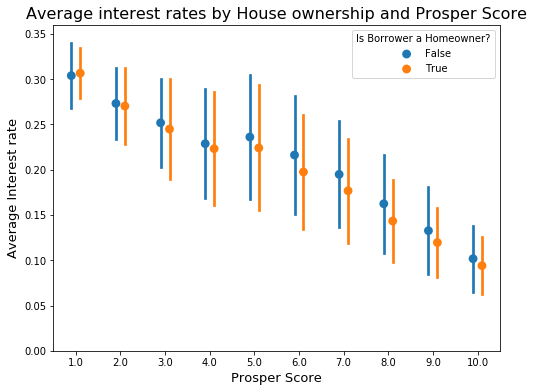

In [12]:
# Plot interest rates across Prosper Scores and the fact of the house ownership
plt.figure(1, figsize = (8,6))
sb.pointplot(data = df, x = "ProsperScore", y = "BorrowerRate", hue = "IsBorrowerHomeowner", linestyles = "", dodge = 0.2, ci = "sd")
plt.ylim((0, 0.36))
plt.title("Average interest rates by House ownership and Prosper Score", fontsize = 16)
plt.xlabel("Prosper Score", fontsize = 13)
plt.ylabel("Average Interest rate", fontsize = 13)
plt.legend(title = "Is Borrower a Homeowner?");

### Prosper and Credit Scores by House Ownership

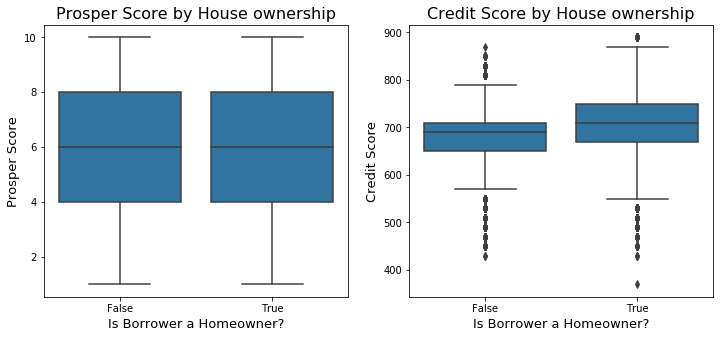

In [13]:
plt.figure(1, figsize = (12,5))
plt.subplot(1,2,1)
sb.boxplot(data = df, x = "IsBorrowerHomeowner", y = "ProsperScore", color = base_color)
plt.title("Prosper Score by House ownership", fontsize = 16)
plt.xlabel("Is Borrower a Homeowner?", fontsize = 13)
plt.ylabel("Prosper Score", fontsize = 13)

plt.subplot(1,2,2)
color = sb.color_palette()[0]
sb.boxplot(data = df, x = "IsBorrowerHomeowner", y = "CreditScore", color = color)
plt.title("Credit Score by House ownership", fontsize = 16)
plt.xlabel("Is Borrower a Homeowner?", fontsize = 13)
plt.ylabel("Credit Score", fontsize = 13);

# Interest rates by Purpose

> Overall, there are no big differences in interest rates across different purposes but still the highest interest rates are set for the loans which are taken for the household expenses. It's due to the fact that these loans have the lowest Prosper Scores. <br> <br>
The lowest rates are set for the purchasing a boat and personal expenses. It's due to the fact that loans taken for a boat have one of the highest Prosper Scores. The loans for personal expenses tend to have low original amounts but a higher number of investors. Therefore, in accordance with these findings, default risks are spread out which makes interest rates one of the lowest.

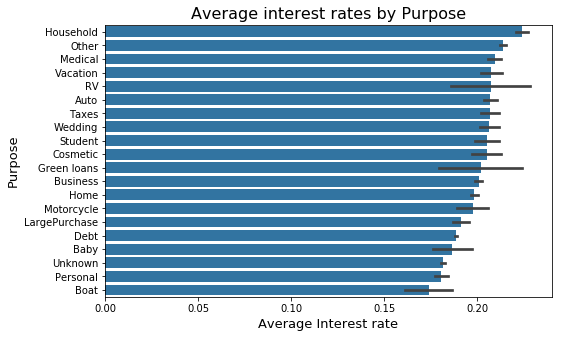

In [14]:
plt.figure(1, figsize = (8,5))
group_means = df.groupby("Purpose").mean()
group_order = group_means.sort_values("BorrowerRate", ascending = False).index
sb.barplot(data = df, y = "Purpose", x = "BorrowerRate", color = base_color, order = group_order)
plt.title("Average interest rates by Purpose", fontsize = 16)
plt.xlabel("Average Interest rate", fontsize = 13)
plt.ylabel("Purpose", fontsize = 13);

# Interest rates by Income range and Prosper Score
Average interest rates are lower for individuals with the higher income range and the highest for not employed across all levels of the Prosper Score. However, this difference is negligible in two extreme cases when Prosper Scores are extremely low (min value = 1) or extremely high (max value = 10). 

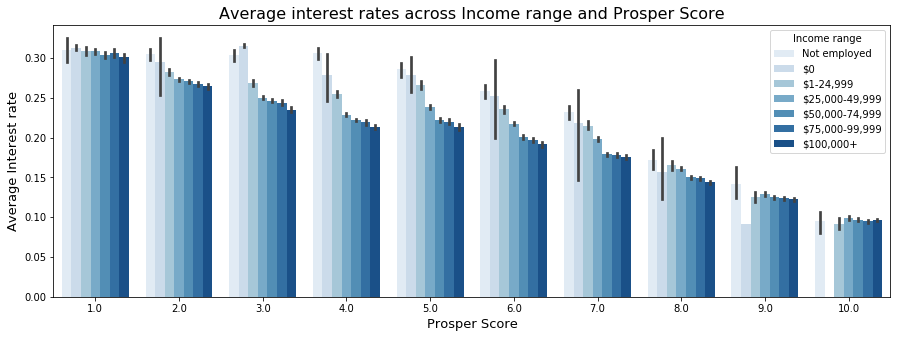

In [15]:
plt.figure(1, figsize = (15,5))
categories = ['Not employed', '$0', '$1-24,999','$25,000-49,999','$50,000-74,999', '$75,000-99,999', '$100,000+']
sb.barplot(data = df, x = "ProsperScore", y = "BorrowerRate", hue = "IncomeRange", palette = "Blues",
           hue_order = categories)
plt.title("Average interest rates across Income range and Prosper Score", fontsize = 16)
plt.xlabel("Prosper Score", fontsize = 13)
plt.ylabel("Average Interest rate", fontsize = 13)
plt.legend(title = "Income range");

# Distribution of loans across Amount, Interest rate and Prosper Score

> Finally, I also checked relationship between loan amounts, Prosper scores and interest rates. It looks like that most of the loans with high ProsperScores and as a result, low-interest rates are for the amounts mostly below 20K dollars.

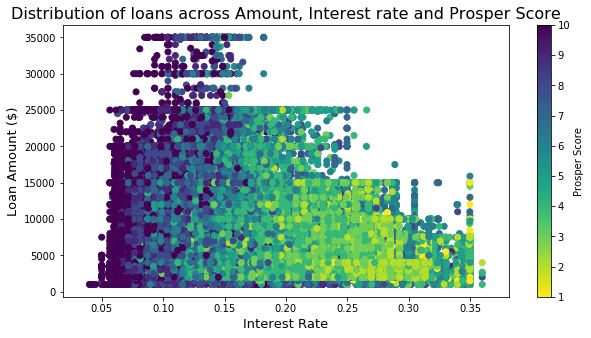

In [16]:
plt.figure(1, figsize = (10,5))
plt.scatter(data = df, x = "BorrowerRate", y = "LoanOriginalAmount", c = "ProsperScore",
           cmap = "viridis_r")
plt.colorbar(label = "Prosper Score")
plt.title("Distribution of loans across Amount, Interest rate and Prosper Score", fontsize = 16)
plt.ylabel("Loan Amount ($)", fontsize = 13)
plt.xlabel("Interest Rate", fontsize = 13);